<a href="https://colab.research.google.com/github/machave11/Supervised-Algorithms-practice/blob/main/Supervised_Algorithms_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learnings Algorithms

# K-Nearst Neighbours 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv.csv')

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df.shape

(768, 9)

In [72]:
# lets create numpy array for features and array
X = df.drop('Outcome', axis=1).values
y= df['Outcome'].values

In [73]:
# import train test split
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=42, stratify=y)

In [75]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Set up array to tarin and test accuracy 
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
  # set up knn clasifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)
  # fit the model
  knn.fit(X_train, y_train)

  # Compute accuracy on training set
  train_accuracy[i] = knn.score(X_train, y_train)
  # compute accuracy on testing set
  test_accuracy[i]= knn.score(X_test,y_test)

<function matplotlib.pyplot.show>

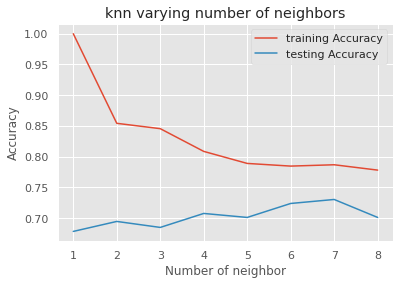

In [76]:
plt.title('knn varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='training Accuracy')
plt.plot(neighbors, test_accuracy, label='testing Accuracy')
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [77]:
# setup knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [78]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [79]:
knn.score(X_test, y_test)

0.7305194805194806

In [80]:
# import confusion metrixs
from sklearn.metrics import confusion_matrix, roc_curve

In [81]:
# lest us predicting using the classifier we had a fit above
y_pred =knn.predict(X_test)

In [82]:
confusion_matrix(y_test, y_pred)

array([[165,  36],
       [ 47,  60]])

In [83]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [84]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

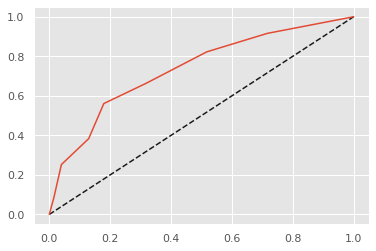

In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')

In [86]:
# Area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.7345050448691124

In [87]:
# Import GridsearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors":np.arange(1,50)}

In [88]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

# Naive bayes classifier


In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns; sns.set()
plt.style.use('ggplot')

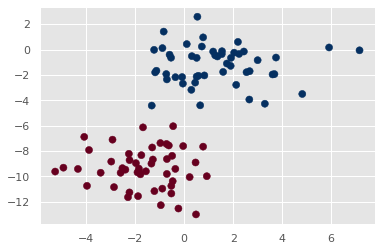

In [90]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [117]:
message = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')[['v1', 'v2']]
message.columns = ['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [118]:
message.shape

(5572, 2)

In [ ]:
message.info()

In [121]:
message['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object>

In [124]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [127]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


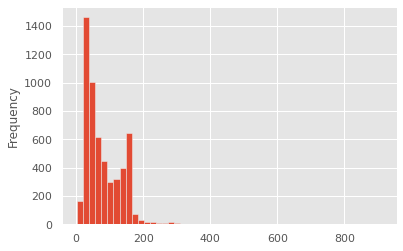

In [129]:
message['length'].plot(bins=50, kind='hist')

In [130]:
message.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [134]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [137]:
import string
from nltk.corpus import stopwords

In [138]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [141]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

Tokenization
it means we just convert our text format in list of token or wards that we actually wnats


In [176]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [142]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [178]:
message['tokenized_message'] = message['message'].apply(text_process)

In [146]:
message.head()

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,111
1,ham,Ok lar... Joking wif u oni...,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,155
3,ham,U dun say so early hor... U c already then say...,49,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,61


Vectorization
list of token convert in vector ,  we use scikit learn model can work with 

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
del vectorizer

In [179]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(message['tokenized_message'])

In [180]:
X.toarray()[4560]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [181]:
print(vectorizer.get_feature_names)

<bound method CountVectorizer.get_feature_names of CountVectorizer(max_df=0.9, min_df=10)>


In [183]:
len(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


872

In [184]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [186]:
message.iloc[4065]['tokenized_message']

'Fyi Im gonna call sporadically starting like ltgt bc doin shit'

In [187]:
X.toarray()[4065]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [189]:
sum(X.toarray()[4560])

10

In [191]:
print(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())

['0800', '08000839402', '08000930705', '10', '100', '1000', '10p', '12', '12hrs', '150', '150p', '150pm', '150pmsg', '150ppm', '16', '18', '1st', '200', '2000', '2003', '250', '2nd', '300', '350', '500', '5000', '750', '800', '8007', '86688', '87066', 'abiola', 'able', 'abt', 'account', 'across', 'actually', 'address', 'admirer', 'aft', 'afternoon', 'age', 'ago', 'ah', 'aight', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'amp', 'angry', 'another', 'ans', 'answer', 'anyone', 'anything', 'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'asap', 'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction', 'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bcoz', 'bday', 'beautiful', 'bed', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bonus', 'book', 'booked', 'bored', 'bout', 'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bslvyl', 'bt', 'bus', 'busy', 'buy', 'call', 'called', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Training model

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.2)

In [194]:
msg_train.head()

1059    EASTENDERS TV Quiz FLOWER DOT compare VIOLET E TULIP F LILY txt E F 84025 4 chance 2 WIN å£100 Cash WKENT150P16
5170    Im school n ill da lab stuff give call Ì r done                                                                
2287    Alex knows guy sells mids hes south tampa dont think could set like 8                                          
1135    K need login anything                                                                                          
3035    ok feel like john lennon                                                                                       
Name: tokenized_message, dtype: object

In [195]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [196]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [200]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array, label_train)

In [201]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [203]:
from sklearn.metrics import confusion_matrix, classification_report

In [207]:
print(confusion_matrix(label_train, train_preds))
print(confusion_matrix(label_test, test_preds))

[[2844 1000]
 [   0  613]]
[[710 271]
 [  6 128]]


In [209]:
print(classification_report(label_train, train_preds))
print(classification_report(label_test, test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.74      0.85      3844
        spam       0.38      1.00      0.55       613

    accuracy                           0.78      4457
   macro avg       0.69      0.87      0.70      4457
weighted avg       0.91      0.78      0.81      4457

              precision    recall  f1-score   support

         ham       0.99      0.72      0.84       981
        spam       0.32      0.96      0.48       134

    accuracy                           0.75      1115
   macro avg       0.66      0.84      0.66      1115
weighted avg       0.91      0.75      0.79      1115

